# 1.1 Install packages

In [56]:
#!pip install tensorflow opencv-python matplotlib

In [57]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [58]:
import tensorflow as tf
import os

# 2 Remove dodgy images

In [59]:
import cv2
import imghdr
from matplotlib import pyplot as plt 

In [60]:
data_dir= "cats&dogs"

In [61]:
image_exts= ['jpeg', 'jpg', 'bmp', 'png']

In [62]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class, image)
        try:
            img= cv2.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

# 3. Load data

In [63]:
import numpy as np

In [64]:
data= tf.keras.utils.image_dataset_from_directory('cats&dogs')

Found 697 files belonging to 2 classes.


In [65]:
data_iterator=data.as_numpy_iterator()

In [66]:
batch=data_iterator.next()

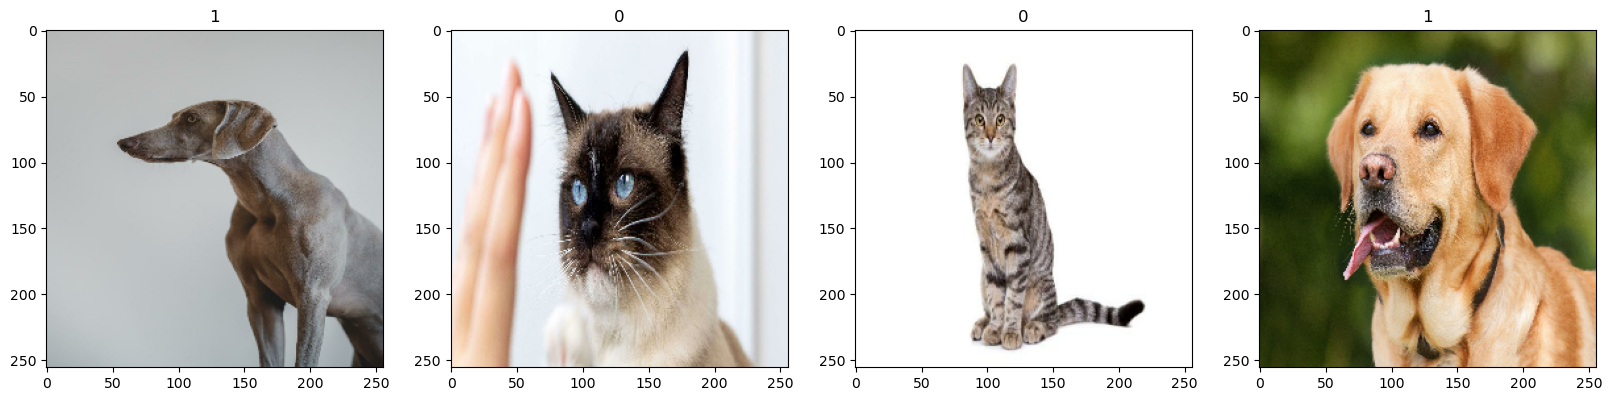

In [67]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [68]:
data= data.map(lambda x,y: (x/255, y))

In [69]:
scaledBatch= data.as_numpy_iterator().next()

In [70]:
scaledBatch[0].max()

1.0

In [71]:
scaledBatch[0].min()

0.0

# 5. Split Data

In [72]:
len(data)

22

In [73]:
train_size= int(len(data)*.7)
val_size= int(len(data)*.2)+1
test_size= int(len(data)*.1)

In [74]:
print(train_size)
print(val_size)
print(test_size)

15
5
2


In [75]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [76]:
print(len(train))
print(len(val))
print(len(test))

15
5
2


# 6. Build Deep Learning Model

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [78]:
model = Sequential()

In [79]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [80]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7.Train

In [82]:
logdir='logs'

In [83]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [84]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
15/15 [==============================] - 14s 770ms/step - loss: 0.7376 - accuracy: 0.5667 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 2/20
15/15 [==============================] - 12s 742ms/step - loss: 0.6922 - accuracy: 0.5250 - val_loss: 0.6897 - val_accuracy: 0.5750
Epoch 3/20
15/15 [==============================] - 12s 751ms/step - loss: 0.6885 - accuracy: 0.5625 - val_loss: 0.6718 - val_accuracy: 0.6375
Epoch 4/20
15/15 [==============================] - 12s 749ms/step - loss: 0.6401 - accuracy: 0.6562 - val_loss: 0.6268 - val_accuracy: 0.6187
Epoch 5/20
15/15 [==============================] - 12s 748ms/step - loss: 0.5568 - accuracy: 0.7354 - val_loss: 0.4993 - val_accuracy: 0.8000
Epoch 6/20
15/15 [==============================] - 12s 738ms/step - loss: 0.4578 - accuracy: 0.8188 - val_loss: 0.4551 - val_accuracy: 0.8313
Epoch 7/20
15/15 [==============================] - 12s 740ms/step - loss: 0.3754 - accuracy: 0.8354 - val_loss: 0.4013 - val_accuracy: 0.8188

# 8. Plot Performance

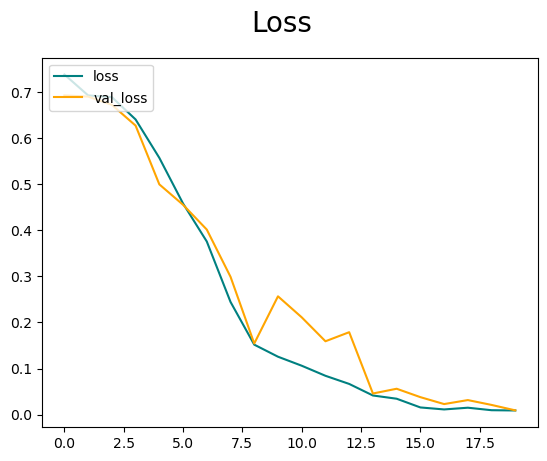

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

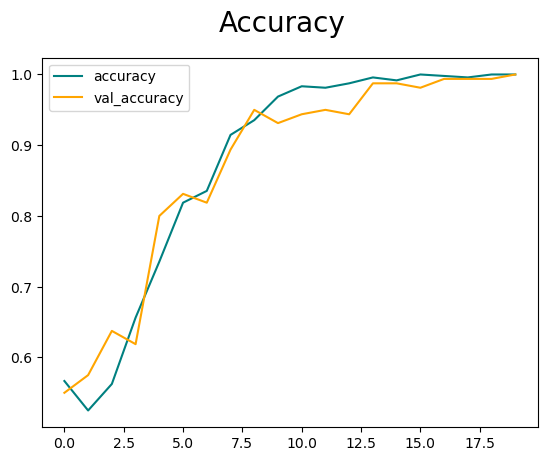

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [89]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 201ms/step


In [90]:
print(f'precision:{pre.result().numpy()}, recall:{re.result().numpy()}, accuracy:{acc.result().numpy()}')

precision:1.0, recall:1.0, accuracy:1.0


# 10. Test

Now,let's test on a photo that is not in the dataset.

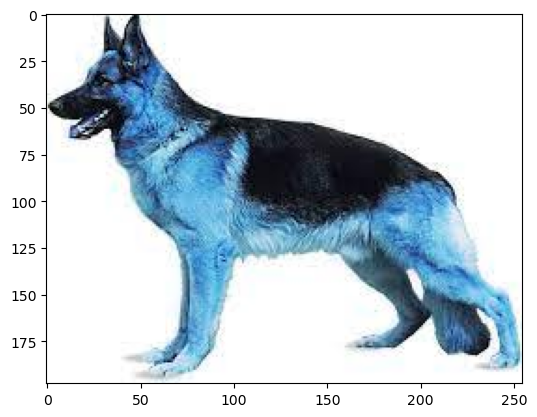

In [117]:
img = cv2.imread('test_dog_4.jpg')
plt.imshow(img)
plt.show()

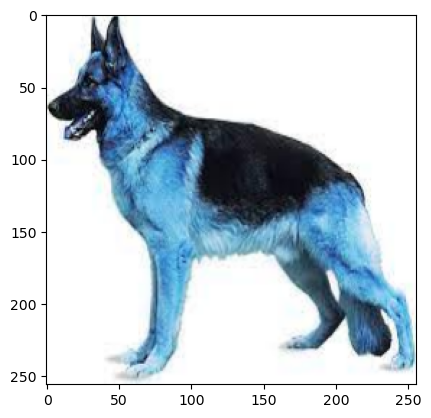

In [118]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [119]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [120]:
yhat

array([[0.98980653]], dtype=float32)

In [121]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cats')

Predicted class is Dog


# 11. Save the Model

In [122]:
model.save(os.path.join('models','imageclassifier_cat&dog.h5'))

Let's see if the model is saved properly.

In [123]:
from tensorflow.keras.models import load_model

In [124]:
new_model = load_model(os.path.join('models','imageclassifier_cat&dog.h5'))

In [125]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


array([[0.98980653]], dtype=float32)

Yes, the model is saved properly.